In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import ast

In [53]:
#Import the csv file into dataframe
df = pd.read_csv("/Users/danishluqman/Documents/Dataset/dataset/videos.csv")

In [54]:
df.shape

(92759, 15)

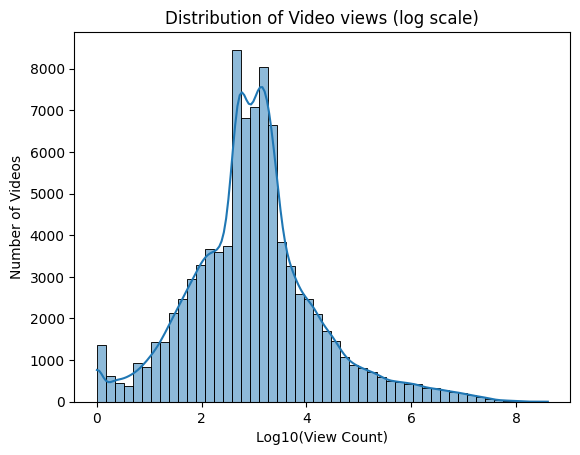

In [55]:
df['log_views'] = np.log10(df['viewCount'] + 1)

sns.histplot(df['log_views'], bins = 50, kde= True)
plt.xlabel("Log10(View Count)")
plt.ylabel("Number of Videos")
plt.title("Distribution of Video views (log scale)")
plt.show()

In [59]:
def clean_tags(x):
    if isinstance(x, list):
        return x  # already clean
    elif isinstance(x, str):
        return [t.strip() for t in x.split(',') if t.strip()]
    else:
        return []

df['tags'] = df['tags'].apply(clean_tags)
df['num_tags'] = df['tags'].apply(len)
df['has_tags'] = df['num_tags'] > 0


df['like_ratio'] = df['likeCount'] / (df['viewCount'] + 1)


In [60]:
print(df['tags'].head(10))

0                                                   []
1                                                   []
2                                                   []
3                                                   []
4                                                   []
5    [['body lotion fit tuber', 'fit tuber body lot...
6                                                   []
7                                                   []
8                                                   []
9                                                   []
Name: tags, dtype: object


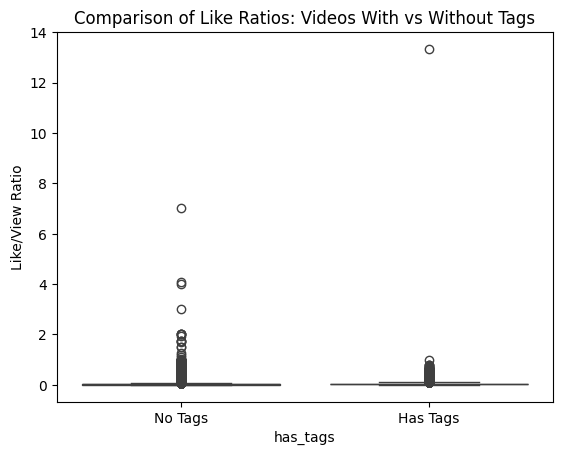

In [61]:
df.groupby('has_tags')['like_ratio'].describe()

sns.boxplot(data=df, x= 'has_tags', y= 'like_ratio')
plt.xticks([0, 1], ['No Tags', 'Has Tags'])
plt.ylabel("Like/View Ratio")
plt.title("Comparison of Like Ratios: Videos With vs Without Tags")
plt.show()

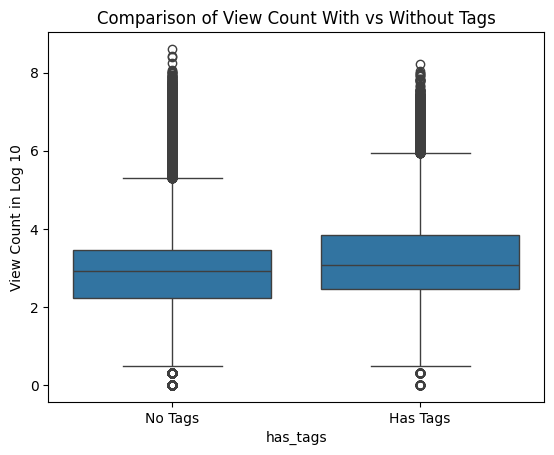

In [62]:
df.groupby('has_tags')['log_views'].describe()

sns.boxplot(data=df, x= 'has_tags', y= 'log_views')
plt.xticks([0, 1], ['No Tags', 'Has Tags'])
plt.ylabel("View Count in Log 10")
plt.title("Comparison of View Count With vs Without Tags")
plt.show()